In [ ]:
# 安裝需要的套件 (Kaggle 通常已內建，但以防萬一)
!pip install transformers scikit-learn seaborn

# 執行程式
# 記得把 --fullData 後面的路徑改成你在第三步複製的 Kaggle 路徑
!python /kaggle/input/sentiment-classifier/pytorch/default/1/model.py \
    --head mlp1 \
    --lrHead 1e-4 \
    --batchSize 16 \
    --dropout 0.1 \
    --epochs 5 \
    --outDir ./saved_models/exp02 \
    --modelName "distilbert-base-uncased" \
    --maxLength 128 \
    --warmupRatio 0.1 \
    --lrEncoder 1e-5 \
    --testSize 0.1 \
    --fullData "/kaggle/input/nelsons/dataset.csv"

# 📊 Results for: TRAIN

📄 Classification Report (train_report.txt):
              precision    recall  f1-score   support

           0     0.9205    0.9130    0.9167     16000
           1     0.8931    0.9307    0.9115     16000
           2     0.9389    0.9070    0.9227     16000

    accuracy                         0.9169     48000
   macro avg     0.9175    0.9169    0.9170     48000
weighted avg     0.9175    0.9169    0.9170     48000

🖼️ Confusion Matrix Plot (train_cm.png):


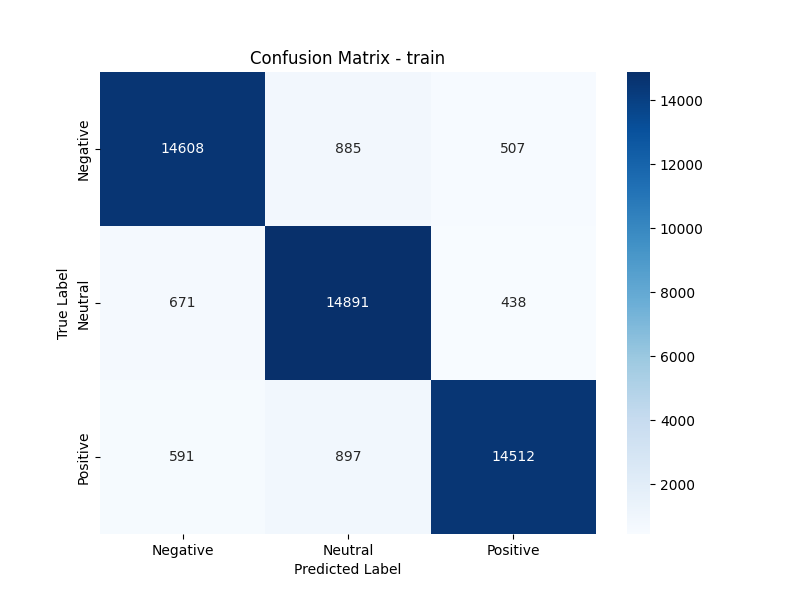

🔢 Confusion Matrix Data (train_cm.csv):


,Unnamed: 0,0,1,2
0,0,14608,885,507
1,1,671,14891,438
2,2,591,897,14512


# 📊 Results for: VAL

📄 Classification Report (val_report.txt):
              precision    recall  f1-score   support

           0     0.8305    0.8305    0.8305      2000
           1     0.8133    0.8300    0.8216      2000
           2     0.8555    0.8380    0.8467      2000

    accuracy                         0.8328      6000
   macro avg     0.8331    0.8328    0.8329      6000
weighted avg     0.8331    0.8328    0.8329      6000

🖼️ Confusion Matrix Plot (val_cm.png):


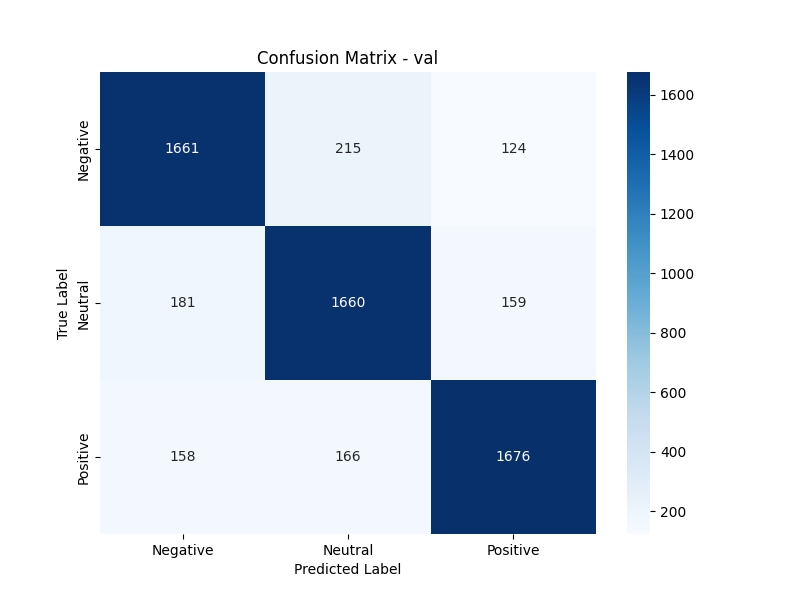

🔢 Confusion Matrix Data (val_cm.csv):


,Unnamed: 0,0,1,2
0,0,1661,215,124
1,1,181,1660,159
2,2,158,166,1676


# 📊 Results for: TEST

📄 Classification Report (test_report.txt):
              precision    recall  f1-score   support

           0     0.8298    0.8165    0.8231      2000
           1     0.8118    0.8495    0.8302      2000
           2     0.8613    0.8350    0.8479      2000

    accuracy                         0.8337      6000
   macro avg     0.8343    0.8337    0.8337      6000
weighted avg     0.8343    0.8337    0.8337      6000

🖼️ Confusion Matrix Plot (test_cm.png):


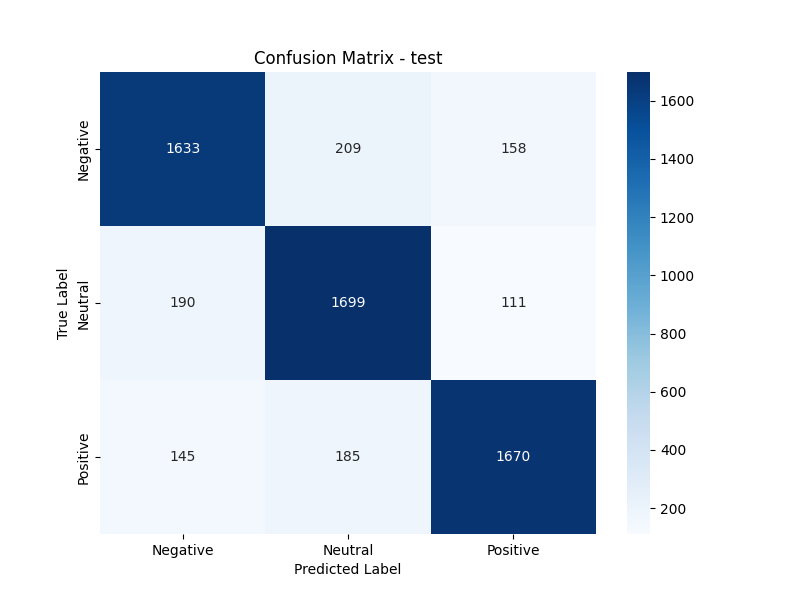

🔢 Confusion Matrix Data (test_cm.csv):


,Unnamed: 0,0,1,2
0,0,1633,209,158
1,1,190,1699,111
2,2,145,185,1670


In [3]:
import os
import pandas as pd
from IPython.display import display, Image, Markdown

# ==========================================
# 設定你的輸出路徑 (要跟剛剛訓練指令的 --outDir 一樣)
# ==========================================
OUT_DIR = "./saved_models/exp02/checkpoint" 
# ==========================================

splits = ["train", "val", "test"]

# 檢查資料夾是否存在
if not os.path.exists(OUT_DIR):
    print(f"錯誤：找不到資料夾 {OUT_DIR}，請確認路徑是否正確或模型是否已訓練完成。")
else:
    for split in splits:
        # 用 Markdown 顯示大標題
        display(Markdown(f"# 📊 Results for: {split.upper()}"))
        
        # 1. 顯示文字報告 (Report Text)
        report_path = os.path.join(OUT_DIR, f"{split}_report.txt")
        if os.path.exists(report_path):
            print(f"📄 Classification Report ({split}_report.txt):")
            with open(report_path, "r") as f:
                print(f.read())
        else:
            print(f"❌ Report not found: {report_path}")

        # 2. 顯示混淆矩陣圖片 (Confusion Matrix Image)
        img_path = os.path.join(OUT_DIR, f"{split}_cm.png")
        if os.path.exists(img_path):
            print(f"🖼️ Confusion Matrix Plot ({split}_cm.png):")
            display(Image(filename=img_path))
        else:
            print(f"❌ Image not found: {img_path}")

        # 3. 顯示混淆矩陣數據 (CSV DataFrame)
        csv_path = os.path.join(OUT_DIR, f"{split}_cm.csv")
        if os.path.exists(csv_path):
            print(f"🔢 Confusion Matrix Data ({split}_cm.csv):")
            df = pd.read_csv(csv_path)
            display(df)
        else:
            print(f"❌ CSV not found: {csv_path}")
            
        print("\n" + "="*60 + "\n")